In [7]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geopy.geocoders import Nominatim

#bruker et bibliotek for å finne koordinater basert på input, for å slippe at brukeren må skrive inn koordinater
geolocator = Nominatim(user_agent="miljøanalyse_abel")
location = geolocator.geocode(input("location: "))
print(location.address)
print((location.latitude, location.longitude))

starttid = "20050101" #YYYYMMDD
sluttid = "20060101" #YYYYMMDD
type = "daily"
lon_min, lon_max = location.longitude-1.01, location.longitude+1.01
lat_min, lat_max = location.latitude-1.01, location.latitude+1.01

url = f"https://power.larc.nasa.gov/api/temporal/{type}/regional?parameters=ALLSKY_SFC_SW_DWN&community=SB&longitude-min={lon_min}&longitude-max={lon_max}&latitude-min={lat_min}&latitude-max={lat_max}&start={starttid}&end={sluttid}&format=JSON"

response = requests.get(url)
if response.status_code == 422:
    print("it kill itself")
    exit("rip")
elif response.status_code == 200:
    print("it work")
elif response.status_code == 429:
    print("stop spam pls")
    exit("rip")

data = response.json()["features"][0]["properties"]["parameter"]["ALLSKY_SFC_SW_DWN"]

plt.plot(range(0,len(data.values())),data.values())
plt.show()

df = pd.DataFrame(list(data.values()),list(data.keys()))

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=&format=json&limit=1 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1018)')))

Gjennomsnitt: 161.760
Standardavvik: 94.605
Median: 155.655


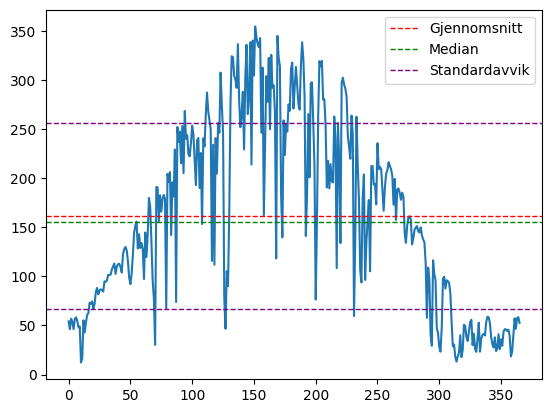

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def average(data):
    return np.mean(data)

def std_dev(data):
    return np.std(data)

def median(data):
    return np.median(data)

std_dev_max = average(df[0]) + std_dev(df[0])
std_dev_min = average(df[0]) - std_dev(df[0])   

print(f"Gjennomsnitt: {average(df[0]):.3f}")
print(f"Standardavvik: {std_dev(df[0]):.3f}")
print(f"Median: {median(df[0]):.3f}")

plt.plot(range(0,len(data.values())),data.values())
plt.axhline(average(df[0]), color='red', linestyle='dashed', linewidth=1, label='Gjennomsnitt')
plt.axhline(median(df[0]), color='green', linestyle='dashed', linewidth=1, label='Median')
plt.axhline(std_dev_max, color='purple', linestyle='dashed', linewidth=1, label='Standardavvik')
plt.axhline(std_dev_min, color='purple', linestyle='dashed', linewidth=1)
plt.legend()
plt.show()
